# Chapter 54: Decision Trees

### This code generates figures 3, 4, and 7 in Chapter 54: Decision Trees (vol. III)

#### Runs simulations for Example 3 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees. Practitioners  should  use it  at their own risk.  While  the  codes in  the text are useful for instructional purposes, they are not intended to serve as examples of full-blown or optimized designs.  The author has made no attempt at optimizing the codes, perfecting them, or even checking them for absolute accuracy. In order to keep the codes at a level  that is  easy to follow by students, the author has often chosen to  sacrifice  performance or even programming elegance in  lieu  of simplicity. Students can use the computer codes to run variations of the examples shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 


required libraries:

1. numpy
2. matplotlib.pyplot
3. scipy.io


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [2]:
#This function selects the most informative attribute to serve as node features: NxM, with each feature vector being a row of size 1xM and has binary values 0 and 1
# 
# labels: +1 or -1 
# 
# returns entropy (H), conditional entropy (cond_H), mutual information (mI) and normalized mutual information (mI_norm) for all attributes, as well Gini gain ratio (DG) and normalized Gini gain ratio (DG_norm),
# and gamma_vec (what labels should be), number of errors (ne)

def node_tree(features, labels):
    
    N = features.shape[0] # number of rows
    M = features.shape[1] # number of columns
    
    probs = np.zeros((2, M)) #  each column has two probabilities: prob(x_m=0) and prob(x_m=1)
    cond_probs = np.zeros((2, M)) # each column has two conditional probabilities: prob(x_m=0|gamma=1) and prob(x_m=0|gamma=-1)
    
    H = np.zeros((M,)) # entropy for each attribute
    cond_H = np.zeros((M,)) # conditional entropy H(x|gamma) for each attribute
    
    mI = np.zeros((M,)) # mutual information for each attribute
    mI_norm = np.zeros((M,)) # normalized mutual information each attribute
    
    G = np.zeros((M,)) # Gini impurity for each attribute
    cond_G = np.zeros((M,)) # conditional Gini impurity
    
    DG = np.zeros((M,)) # Gini gain ratio
    DG_norm = np.zeros((M,)) # normalized Gini gain ratio
    
    ne = np.zeros((M,)) # number of errors for each attribute
    
    gamma_vec = np.zeros((2, M)) # first row is gamma_1 and second row is gamma_0
    gamma_1 = np.zeros((M,)) # if we end at attribute m, the entry gamma_1(m) tells us what the label (+-1) should be when x(m)=1
    gamma_0 = np.zeros((M,)) # if we end at attribute m, the entry gamma_0(m) tells us what the label (+-1) should be when x(m)=0
    
    error_vec = np.zeros((2, M)) # first row is error_1 and second row is error_0
    
    N_p1 = 0 # how many features exist at class +1
    N_m1 = 0 # how many features exist at class -1
    a = 0
    b = 0
    
    for n in range(N):
        if labels[n] == 1 :
            N_p1 = N_p1 + 1
        else:
            N_m1 = N_m1 + 1
            
            
    prob_gamma_p1 = N_p1/N # probability of label gamma = +1
    prob_gamma_m1 = N_m1/N # probability of label gamma = -1
    H = np.zeros((M,))
    G = np.zeros((M,))
    
    for m in range(M): # iterate over attributes
        counter_0 = 0 # counts how many times x_m is at zero
        counter_1 = 0
        
        counter_0_p1 = 0 # counts how many times x_m = 0 under class +1
        counter_0_m1 = 0 # counts how many times x_m = 0 under class -1
        
        for n in range(N): # iterating over all data for each attribute m
            x = features[n, m]
            if x == 0:
                counter_0 = counter_0 + 1
            else:
                counter_1 = counter_1 + 1
                
            if labels[n] == 1:
                if x == 0:
                    counter_0_p1 = counter_0_p1 + 1
                    
            else:
                if x == 0:
                    counter_0_m1 = counter_0_m1 + 1
                    
                    
        p0 = counter_0/N
        p1 = counter_1/N
        probs[0, m] = p0
        probs[1, m] = p1
            
        if p0 == 0:
            a = 0
        else:
            a = -p0*np.log2(p0)
            
        if p1 == 0:
            b = 0
        else:
            b = -p1*np.log2(p1)
            
        H[m] = a + b # estimated entropy for m-th attribute
        G[m] = 1-p0**2-p1**2 # estimated Gini impurity
        
        # we now estimate the conditional entropies
        p0_m1 = 0
        p0_p1 = 0
        p1_p1 = 0
        p1_m1 = 0
        
        if N_p1 != 0:
            p0_p1 = counter_0_p1/N_p1
            p1_p1 = 1- p0_p1
        
        if N_m1 != 0:
            p0_m1 = counter_0_m1/N_m1
            p1_m1 = 1-p0_m1
        
        cond_probs[0, m] = p0_p1
        cond_probs[1, m] = p0_m1
        
        if p0_p1 == 0:
            a = 0
        else:
            a = -p0_p1*np.log2(p0_p1)
            
        if p1_p1 == 0:
            b = 0
        else:
            b = -p1_p1 * np.log2(p1_p1)
        
        
        cond_1 = a + b # estimated conditional entropy for m-th attribute under gamma=1: H(x_m|gamma=+1)
        cond_1_Gini = 1- (p0_p1)**2 - (p1_p1)**2 # conditional Gini impurity
        
        if p0_m1 == 0:
            a = 0
        else:
            a = -p0_m1*np.log2(p0_m1)
            
        if p1_m1 == 0:
            b = 0
        else:
            b = -p1_m1*np.log2(p1_m1)
            
        cond_2 = a + b # estimated conditional entropy for m-th attribute under gamma=-1:  H(x_m|gamma=-1)
        cond_2_Gini = 1 - (p0_m1)**2 - (p1_m1)**2 # conditional Gini impurity
        
        cond_H[m] = prob_gamma_p1*cond_1 + prob_gamma_m1*cond_2
        cond_G[m] = prob_gamma_p1*cond_1_Gini + prob_gamma_m1*cond_2_Gini
        
        mI[m] = H[m] - cond_H[m] # mutual information
        mI_norm[m] = mI[m]/H[m] # normalized mutual information
        
        DG[m] = G[m] - cond_G[m] # Gini gain ratio
        DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio
        error_1 = np.zeros((M,))
        error_2 = np.zeros((M,))
        
    # estimating number of errors    
    for m in range(M):
        counter_p1_1 = 0 # how many labels +1 when x(m) = +1
        counter_m1_1 = 0 # how many labels -1 when x(m) = +1
        counter_p1_0 = 0 # how many labels +1 when x(m) = 0
        counter_m1_0 = 0 # how many labels -1 when x(m) = 0
        for n in range(N):
            x = features[n, m]
            if x == 1:
                if labels[n] == 1:
                    counter_p1_1 = counter_p1_1 + 1
                else:
                    counter_m1_1 = counter_m1_1 + 1
            if x == 0:
                if labels[n] == 1:
                    counter_p1_0 = counter_p1_0 + 1
                else:
                    counter_m1_0 = counter_m1_0 + 1
                    
        if counter_p1_1 >= counter_m1_1: # will decide in favor of class +1 along this branch
            ne[m] = ne[m] + counter_m1_1
            gamma_1[m] = 1 # decide that class is +1 if we stop here when x(m)=1
        else:
            ne[m] = ne[m] + counter_p1_1
            gamma_1[m] = -1 # decide that class is -1 if we stop here when x(m)=1 
            
        error_1[m] = ne[m] # how many classification errors will occur when x(m)=1
        if counter_p1_0 >= counter_m1_0: # will decide in favor of class +1 along this branch
            ne[m] = ne[m] + counter_m1_0
            gamma_0[m] = 1 # decide that class is +1 if we stop here when x(m)=0;
        else:
            ne[m] = ne[m] + counter_p1_0
            gamma_0[m] = -1 # decide that class is -1 if we stop here when x(m)=0;
            
        error_2[m] = ne[m] - error_1[m] # how many classification errors will occur when x(m)=1

        
    gamma_vec[0, :] = gamma_1
    gamma_vec[1, :] = gamma_0
    error_vec[0, :] = error_1
    error_vec[1, :] = error_2
        
    return H, cond_H, mI, mI_norm, DG, DG_norm, ne, gamma_vec, error_vec
                    
                    


## Figure 54.3 (Entropy and Gini impurity)

We explained in Example 6.1 that the entropy of a random variable reveals the amount of uncertainty we have about it.  For example, for a Boolean variable $x$, if it happens that $p=1$, then  we would expect to observe
the event $x=1$ each time an experiment is performed on $x$. The entropy in this case is $H(x)=0$. A similar situation occurs when $p=0$, for which we would expect to observe the event $x=0$ each time an experiment is performed on $x$. The entropy again evaluates to $H(x)=0$. The case of most uncertainty about $x$ arises when $p=1/2$. In this situation, the events $x=1$ and $x=0$ are equally likely and the entropy evaluates to $H(x)=1$.  Figure 54.3 plots $H(p)$ versus $p$; it is seen that the function is concave, attains the value zero at locations $p=0,1$, and attains the maximum value of 1 at $p=1/2$.

In [3]:
nx = 0
H = np.zeros((np.arange(0, 1.01, 0.01).shape[0],))
G = np.zeros((np.arange(0, 1.01, 0.01).shape[0],))
for p in np.arange(0, 1.01, 0.01):
    if p == 0:
        H[nx] = -(1-p)*np.log2(1-p)
    elif p ==1:
        H[nx]= -p*np.log2(p)
    else:
        H[nx] = -p*np.log2(p) -(1-p)*np.log2(1-p)
        
    G[nx] = 2*p*(1-p)
    nx = nx + 1

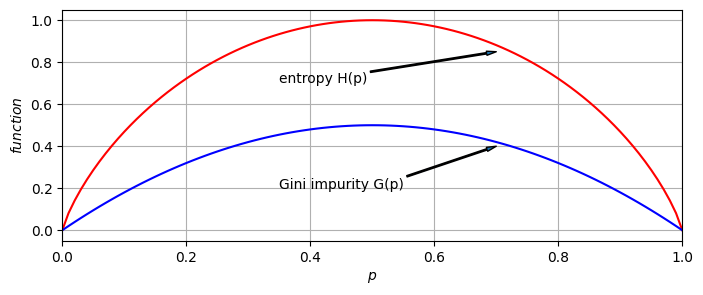

In [6]:
f1, axs1 = plt.subplots(1, 1, figsize=(8,3));
axs1.plot(np.arange(0, 1.01, 0.01), H, color = 'red');
axs1.plot(np.arange(0, 1.01, 0.01), G, color = 'blue');
axs1.set_ylabel("$function$");
axs1.set_xlabel("$p$");
axs1.grid(True)
axs1.set_xlim([0,1])
axs1.annotate("entropy H(p)",xy=(0.7, 0.85),xytext=(0.35, 0.7),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate("Gini impurity G(p)",xy=(0.7, 0.4),xytext=(0.35, 0.2),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('fig 54.3.pdf')

**Figure 54.3** Plot of the entropy function (54.23) for a Boolean random variable as a function of $p\in[0,1]$, along with a plot of the Gini impurity defined later in (54.43) for comparison purposes.

## Figure 54.6 (decision tree for the FLU example)

In [7]:
# label = +1 --> has FLU
# label = -1 --> does not have FLU

# We will use the mutual information measure to construct the tree

import numpy as np
features = np.array([[1,0,0,1,0,0],
            [1,1,0,0,1,1], [0,1,1,0,1,1],
            [0,0,0,1,0,0], [0,1,0,1,1,0],
            [1,0,1,0,1,1], [1,0,0,0,0,0],
            [0,1,0,1,0,0], [1,1,0,0,0,1], 
            [1,0,0,0,1,1]])

labels = np.array([-1, 1, 1, -1, -1, 1, -1, -1, 1, -1])
N = features.shape[0]
M = features.shape[1]
indexes = np.arange(0,M)

In [8]:
# This table starts with the root node in its first row.
# Each row contains:
# node index, node to its right (if 0, we stop there), label if we stop there, #errors if we stop there, 
# node to its left (if 0 we stop there), label, #errors

counter = 0
tree_structure = np.zeros((M, 7))

#choosing the top root node
H, cond_H, mI, mI_norm, DG, DG_norm, ne, gamma_vec, error_vec = node_tree(features, labels)

print('entropy values for each attribute, H(x)', H)
print('conditional entropy H(x|gamma) for each attribute', cond_H)
print('mutual information for each attribute; a column in Table 4', mI)
print('normalized mutual information for each attribute; a column in Table 4', mI_norm)
print('Gini measure for each attribute; a column in Table 4', DG)
print('normalized Gini measure for each attribute; a column in Table 4', DG_norm)
print('if we end at an attribute m, what the label should be when m=1 (first row) and when m=0 (second row)', gamma_vec)
print('if we end at an attribute m, how many classification errors occur when m=1 (first row) and when m=0 (second row)', error_vec)



entropy values for each attribute, H(x) [0.97095059 1.         0.72192809 0.97095059 1.         1.        ]
conditional entropy H(x|gamma) for each attribute [0.92451125 0.87548875 0.4        0.5509775  0.87548875 0.39001345]
mutual information for each attribute; a column in Table 4 [0.04643934 0.12451125 0.32192809 0.41997309 0.12451125 0.60998655]
normalized mutual information for each attribute; a column in Table 4 [0.04782874 0.12451125 0.4459282  0.43253807 0.12451125 0.60998655]
Gini measure for each attribute; a column in Table 4 [0.03       0.08333333 0.12       0.21333333 0.08333333 0.33333333]
normalized Gini measure for each attribute; a column in Table 4 [0.0625     0.16666667 0.375      0.44444444 0.16666667 0.66666667]
if we end at an attribute m, what the label should be when m=1 (first row) and when m=0 (second row) [[ 1.  1.  1. -1.  1.  1.]
 [-1. -1. -1.  1. -1. -1.]]
if we end at an attribute m, how many classification errors occur when m=1 (first row) and when m=0 

In [9]:
a = np.max(mI) # idx is index of attribute to serve as the root node
root = np.argmax(mI)
labels_root = gamma_vec[:, root] # a 2x1 vector. Top entry is label to use when root =1; second entry is label to use when root =0
errors_root = error_vec[:, root] # a 2x1 vector. Top entry is # errors  when root =1; second entry is# errors when root =0

display('root node, labels, and errors')
print(root)
print(labels_root)
print(errors_root)


'root node, labels, and errors'

5
[ 1. -1.]
[1. 0.]


In [14]:
tree_structure[counter,0] = root;
tree_structure[counter,2] = labels_root[0];
tree_structure[counter,3] = errors_root[0];
tree_structure[counter,5] = labels_root[1];
tree_structure[counter,6] = errors_root[1];



In [10]:
# choosing the node on the right when root assumes value = 1

m1 = 0
m0 = 0
features_1 = np.array([])
labels_1 = np.array([])
features_0 = np.array([])
labels_0 = np.array([])

for n in range(N):
    if features[n, root] == 1:
        if features_1.shape[0] == 0:
            features_1 = np.append(features_1, np.concatenate([features[n,0:root], features[n,root+1:M]]))
        else:
            features_1 = np.vstack((features_1, np.concatenate([features[n,0:root], features[n,root+1:M]])))
        
        labels_1 = np.append(labels_1, labels[n])
        m1 = m1 + 1
    else:
        if features_0.shape[0] == 0:
            features_0 = np.append(features_0 ,np.concatenate([features[n,0:root], features[n,root+1:M]]))
        else:
            features_0 = np.vstack((features_0, np.concatenate([features[n,0:root], features[n,root+1:M]])))
        
        labels_0 = np.append(labels_0, labels[n])
        m0 = m0 + 1
        
        
indexes_1 = np.concatenate([indexes[0:root], indexes[root+1:M]])
M_1 = features_1.shape[1]
N_1 = features_1.shape[0]

H_1, cond_H_1, mI_1, mI_norm_1, DG_1, DG_norm_1, ne_1, gamma_vec_1, error_vec_1 = node_tree(features_1,labels_1)
a_1 = np.max(mI_1)
root_1 = np.argmax(mI_1)
labels_root_1 = gamma_vec_1[:, root_1] # a 2x1 vector. Top entry is label to use when root =1; second entry is label to use when root =0
errors_root_1 = error_vec_1[:, root_1] # a 2x1 vector. Top entry is # errors  when root =1; second entry is# errors when root =0
print('choosing the node on the right when root values is 1')
print('node index, labels, and errors:')
print(root_1)
print(labels_root_1)
print(errors_root_1)



choosing the node on the right when root values is 1
node index, labels, and errors:
1
[1. 1.]
[0. 1.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_1888\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_1888\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [11]:
tree_structure[counter,1] = indexes_1[root_1];

counter = counter+1;
tree_structure[counter,0] = indexes_1[root_1];
tree_structure[counter,2] = labels_root_1[0];
tree_structure[counter,3] = errors_root_1[0];
tree_structure[counter,5] = labels_root_1[1];
tree_structure[counter,6] = errors_root_1[1];


In [12]:
# choosing the node on the left when this second node assumes value 0

m1 = 0
m0 = 0

features_1b = np.array([])
labels_1b = np.array([])
features_0b = np.array([])
labels_0b = np.array([])

for n in range(N_1):
    if features_1[n, root_1] == 1:
        if features_1b.shape[0] == 0:
            features_1b = np.append(features_1b, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M_1]]))
        else:
            features_1b = np.vstack((features_1b, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]])))
        
        labels_1b = np.append(labels_1b, labels_1[n])
        m1 = m1 + 1
    else:
        if features_0b.shape[0] == 0:
            features_0b = np.append(features_0b ,np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]]))
        else:
            features_0b = np.vstack((features_0b, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]])))
        
        labels_0b = np.append(labels_0b, labels_1[n])
        m0 = m0 + 1

M_2 = features_0b.shape[1]
N_2 = features_0b.shape[0]
indexes_0b = np.concatenate([indexes_1[0:root_1], indexes_1[root_1+1:M_1]])

H_0b, cond_H_0b, mI_0b, mI_norm_0b, DG_0b, DG_norm_0b, ne_0b, gamma_vec_0b, error_vec_0b = node_tree(features_0b,labels_0b)
a_0 = np.max(mI_0b)
root_0b = np.argmax(mI_0b)
labels_root_0b = gamma_vec_0b[:,root_0b]
errors_root_0b = error_vec_0b[:,root_0b]

print('choosing the node on the left when second root value is 0')
print('node index, labels, and errors')
print(root_0b)
print(labels_root_0b)
print(errors_root_0b)


choosing the node on the left when second root value is 0
node index, labels, and errors
1
[ 1. -1.]
[0. 0.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_1888\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_1888\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [14]:
tree_structure[counter,4] = indexes_0b[root_0b];

counter = counter+1
tree_structure[counter,0] = indexes_0b[root_0b]
tree_structure[counter,2] = labels_root_0b[0]
tree_structure[counter,3] = errors_root_0b[0]
tree_structure[counter,5] = labels_root_0b[1]
tree_structure[counter,6] = errors_root_0b[1]




## Example 54.3 (Constructing a decision tree for a heart disease dataset)

We apply the procedure to construct a decision tree for the heart disease dataset. The dataset consists of 297 samples with feature vectors that contain 13 attributes each. These attributes are described in 
Table 54.7. There are four classes: class 0 (patient has no heart disease) and  classes 1, 2, 3 (patient has heart disease). We group the last three classes into a single class and relabel the feature data into two classes only $\gamma=+1$ (heart disease is present) and $\gamma=-1$ (heart disease is absent).

**Table 54.7** Original attributes for the heart disease dataset. This dataset is derived from the site https://archive.ics.uci.edu/ml/datasets/heart+Disease. 
<table style="width: 70%;">
    <tr>
    <th>Attribute</th>
    <th>Explanation</th>
    </tr>
  <tr>
    <th>1</th>
    <th> Patient's age measured in year.</th>
   </tr>
  <tr>
    <th>2</th>
    <th> Patient's sex (male or female).</th>
   </tr>
  <tr>
    <th>3</th>
    <th> Chest pain type: typical angina (value 1), atypical angina (2), non-anginal pain (3), and asymptomatic (4).</th>
   </tr>
    
  <tr>
    <th>4</th>
    <th> Resting blood pressure measured in mm Hg.</th>
   </tr>
    
  <tr>
    <th>5</th>
    <th> Serum cholesterol level measured in mg/dl.</th>
   </tr>
  <tr>
    <th>6</th>
    <th> Fasting blood sugar level above 120 mg/dl) (1 = true; 0 = false).</th>
   </tr>
    
  <tr>
    <th>7</th>
    <th> Resting electrocardiographic result: normal (value 0), having ST-T wave abnormality, such as T wave inversions and/or ST elevation or depression larger than 0.05 mV (value 1), or showing probable or definite left ventricular hypertrophy by Estes' criteria (value 2)</th>
   </tr>
  
   <tr>
    <th>8</th>
    <th> Maximum heart rate measured in beats per minute (bpm).</th>
   </tr>
    
  <tr>
    <th>9</th>
    <th> Exercise induced angina (1 = yes; 0 = no).</th>
   </tr>
  
   <tr>
    <th>10</th>
    <th> Size of ST depression induced by exercise relative to rest.</th>
   </tr>
  
   <tr>
    <th>11</th>
    <th> Slope of the peak exercise ST segment: upsloping (value 1), flat (value 2), or downsloping (value 3).</th>
   </tr>
    
  <tr>  
    <th>12</th>
    <th> Number of major vessels colored by fluoroscopy (0, 1, 2, 3).</th>
   </tr>
  <tr>
      
   <th>13</th>
    <th> Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.</th>
   </tr>
</table>
  

The first step in processing the data is to redefine the attributes and replace them by binary-valued variables. Some of the attributes are already binary in nature, such as attribute $6$ (blood sugar level),  and attribute $9$ (exercise induced angina). Other attributes assume real values. There are many ways by which they can be transformed into binary variables. The following procedure is one possibility and is only meant for illustration purposes.

Consider, for example, attribute $1$ (patient's age). We compute the average age of all patients in the given dataset. Then, for each patient we set their age variable to $1$ if the patient's age is above the average and to 0 otherwise:

$$
x =\begin{cases}
1 & \text{if patient's age is above average}\\
0 & \text{otherwise}
\end{cases} \tag{54.54}
$$


We perform the same transformation for attribute $4$ (resting blood pressure), attribute $5$ (serum cholesterol level), attribute $8$ (heart beat rate), and attribute $10$ (size of ST depression).

The remaining attributes are discrete in nature and we can transform them into binary variables as follows. Consider attribute $3$ (chest pain type). There are four types. We therefore introduce four binary variables:

$$
x_1 = \begin{cases}
1 & \text{if chest pain is typical angina}\\
0 & \text{otherwise}
\end{cases} \tag{54.55a}
$$


$$
x_2 =\begin{cases}
1 &  \text{if chest pain is atypical angina}\\
0 & \text{otherwise}
\end{cases} \tag{54.55b}
$$


$$
x_3 = \begin{cases}
1 & \text{if chest pain is non-anginal pain}\\
0 & \text{otherwise}
\end{cases} \tag{54.55c}
$$


$$
x_4 = \begin{cases}
1 & \text{if chest pain is asymptomatic}\\
0 & \text{otherwise}
\end{cases} \tag{55.55d}
$$

Likewise, for attribute $7$, we have three levels and  introduce three binary variables as follows:

$$
x_5 = \begin{cases}
1 & \text{if electrocardiographic result is normal}\\
0 & \text{otherwise}
\end{cases} \tag{54.56a}
$$

$$
x_6 = \begin{cases}
1 & \text{if electrocardiographic result is abnormal}\\
0 & \text{otherwise}
\end{cases} \tag{54.56b}
$$

$$
x_7 = \begin{cases}
1 &  \text{if electrocardiographic result shows hypertrophy}\\
0 & \text{otherwise}
\end{cases} \tag{54.56c}
$$


Similarly, for attributes $11$ (slope of ST segment), $12$ (number of colored vessels), and $13$ (thal condition). In this way, we end up with an expanded feature vector $h'$ with $M'=25$ binary attributes. We will use these expanded features vectors to construct the decision tree. Table 54.8 lists the binary attributes.
 
**Table 54.8** Binary attributes for the heart disease dataset.
<table style="width: 70%;">
    <tr>
    <th>Attribute</th>
    <th>Explanation</th>
    </tr>
  <tr>
    <th>1</th>
    <th> 1 (patient's age above average), 0 (otherwise).</th>
   </tr>
  <tr>
    <th>2</th>
    <th> 1 (male), 0 (female).</th>
   </tr>
  <tr>
    <th>3</th>
    <th> 1 (chest pain is typical angina), 0 (otherwise)</th>
   </tr>
    
  <tr>
    <th>4</th>
    <th> 1 (chest pain is atypical angina), 0 (otherwise)</th>
   </tr>
    
  <tr>
    <th>5</th>
    <th> 1 (chest pain is non-anginal), 0 (otherwise)</th>
   </tr>
  <tr>
    <th>6</th>
    <th> 1 (chest pain is non-anginal), 0 (otherwise)</th>
   </tr>
    
  <tr>
    <th>7</th>
    <th> 1 (blood pressure above average), 0 (otherwise)</th>
   </tr>
  
   <tr>
    <th>8</th>
    <th> 1 (cholesterol level above average), 0 (otherwise).</th>
   </tr>
    
  <tr>
    <th>9</th>
    <th> 1 (blood sugar level above average), 0 (otherwise).</th>
   </tr>
  
   <tr>
    <th>10</th>
    <th> 1 (electrocardiographic result is normal), 0 (otherwise).</th>
   </tr>
  
   <tr>
    <th>11</th>
    <th> 1 (electrocardiographic result is abnormal), 0 (otherwise).</th>
   </tr>
    
  <tr>  
    <th>12</th>
    <th> 1 (electrocardiographic result shows hypertrophy), 0 (otherwise).</th>
   </tr>
  <tr>
      
   <th>13</th>
    <th> 1 (heart rate above average), 0 (otherwise). </th>
   </tr>
    
  <tr>
   <th>14</th>
    <th> 1 (if angina is exercise induced), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>15</th>
    <th> 1 (if size of ST depression is above average), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>16</th>
    <th> 1 (if ST segment is upsloping), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>17</th>
    <th> 1 (if ST segment is flat), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>18</th>
    <th> 1 (if ST segment is downsloping), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>19</th>
    <th> 1 (if no vessels are colored by fluoroscopy), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>20</th>
    <th> 1 (if one vessel is colored by fluoroscopy), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>21</th>
    <th> 1 (if two vessels are colored by fluoroscopy), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>22</th>
    <th> 1 (if three vessels are colored by fluoroscopy), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>23</th>
    <th> 1 (if thal condition is normal), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>24</th>
    <th> 1 (if thal has fixed defect), 0 (otherwise).</th>
  </tr>
    
  <tr>
   <th>25</th>
    <th> 1 (if thal has reversible defect), 0 (otherwise).</th>
  </tr>
</table>

We select $238$ samples ($80\%$) for training and use the remaining $59$ samples ($20\%$) for testing. In the simulation, we employ the mutual information measure to identify the root nodes at the various stages of the tree construction. For example, according to this criterion, the most informative attribute is found to be 

$$
\text{attribute 6: is the chest pain asymptomatic?} \tag{54.57}
$$

If the answer is in the affirmative, and after removing this attribute, the next most informative attribute is found to be 

$$
\text{attribute 19: are zero vessels colored by fluoroscopy?} \tag{54.58}
$$

On the other hand, if the chest pain is not asymptomatic, the next most informative attribute is found to be

$$
\text{attribute 23: is the thal condition normal?} \tag{54.59}
$$


Figure 54.7 shows several layers of the resulting decision tree, along with the labels at the leaves. The tree is not intended to be a reliable predictor of the presence or absence of heart disease; in this example, the amount of available data is small to enable an accurate classifier. This particular tree results in 16 errors over the $59$ test samples, which corresponds to an empirical error rate of $27.12\%$ over the test data. It also results in 32 errors over the entire 238 training samples, which corresponds to an empirical error rate of $13.45\%$ over the training data.

In [10]:
# The heart disease dataset consists of 297 samples with 13 attributes each.
# It is derived from the processed cleveland dataset from the site
# https://archive.ics.uci.edu/ml/datasets/heart+Disease 

# The 13 attributes are
#
# 1. age in years 
# 2. sex (1:male, 0:female) 
# 3. chest pain type:  typical angina (value 1), atypical angina (2), 
#    non-anginal pain (3), asymptomatic (4).
# 4. resting blood pressure (in mm Hg on admission to the hospital)  
# 5. serum cholesterol in mg/dl  
# 6. fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
# 7. resting electrocardiographic results 
#     a) value 0: normal 
#     b) value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#     c) value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
# 8. maximum heart rate (bpm) achieved 
# 9. exercise induced angina (1 = yes; 0 = no) 
# 10. ST depression induced by exercise relative to rest  
# 11. Slope of the peak exercise ST segment 
#     a) value 1: upsloping 
#     b) value 2: flat 
#     c) value 3: downsloping  
# 12. number of major vessels (0-3) colored by flouroscopy
# 13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect 
#   
#
# The class type is
#      class 0 (no heart disease): <50% diameter narrowing
#      classes 1, 2, 3 (heart disease): >50% diameter narrowing


print('GENERATING DECISION TREE FOR HEART-DISEASE DATA')


GENERATING DECISION TREE FOR HEART-DISEASE DATA


In [11]:
import scipy.io
data = scipy.io.loadmat('./data/heart_disease_data_original.mat') # loaded into variables Ao and labels

labels_multi = data['labels']
features_org = data['Ao']

labels_multi = labels_multi.reshape(-1,) # has five classes 0 (no heart disease) and 1,2,3,4 (heart disease)
N = data['Ao'].shape[0]
M = data['Ao'].shape[1]-1


In [12]:
# we transform the labels to +1 (heart disease) and -1 (no heart disease)

labels = np.zeros((N,))

for n in range(N):
    if labels_multi[n] != 0:
        labels[n] = 1
    else:
        labels[n] = -1
        
# We transform the features into binary values
 
# Age is in years. we compute the average age and replace by 1 if age
# larger than average, and 0 otherwise
         
features = np.zeros((N, M+3+2+2+3+2+1))

mean_age = np.mean(features_org[:,0])
for n in range(N):
    if features_org[n, 0] >= mean_age:
        features[n, 0] = 1
    else:
        features[n, 0] = 0

# sex (male=1,female=0) is already binary        
features[:, 1] = features_org[:, 1]

# chest pain type:  typical angina (value 1), atypical angina (2), 
# non-anginal pain (3), asymptomatic (4).
# we make each a binary value and therefore replace this column by four columns 

for n in range(N):
    if features_org[n, 2] == 1:
        features[n, 2] = 1
        
    if features_org[n, 2] == 2:
        features[n, 3] = 1
        
    if features_org[n, 2] == 3:
        features[n, 4] = 1
    
    if features_org[n, 2] == 4:
        features[n, 5] = 1

        
# Resting blood pressure measured in mm Hg
# We compute its average and replace by a binary variable (larger or smaller than average)
 
mean_pressure = np.mean(features_org[:,3])
for n in range(N):
    if features_org[n, 3] >= mean_pressure:
        features[n, 6] = 1
    else:
        features[n, 6] = 0


# Serum cholesteral measured in mg/dl  
# We compute its average and replace by a binary variable (larger or
# smaller than average)
 
mean_serum = np.mean(features_org[:,4])
for n in range(N):
    if features_org[n, 4] >= mean_serum:
        features[n, 7] = 1
    else:
        features[n, 7] = 0

# fasting blood sugar > 120 mg/dl is binary already     
features[:, 8] = features_org[:, 5]

# resting electrocardiographic results has 3 values; we add 3 binary
# columns

for n in range(N):
    if features_org[n, 6] == 0:
        features[n, 9] = 1
        
    if features_org[n, 6] == 1:
        features[n, 10] = 1
        
    if features_org[n, 6] == 2:
        features[n, 11] = 1
        
# maximum heart rate in bpm
# we compute the average and replace by a binary column (larger or smaller
# than average)

mean_rate = np.mean(features_org[:,7]);
for n in range(N):
    if features_org[n,7] >= mean_rate:
        features[n,12] = 1;
    else:
        features[n,12] = 0;
        
# exercise induced angina is binary already

features[:, 13] = features_org[:, 8]

# ST depression induced by exercise relative to rest.
# We compute average and transform into binary column (larger or smaller
# than average)

mean_ST = np.mean(features_org[:,9])
for n in range(N):
    if features_org[n, 9] >= mean_ST:
        features[n, 14] = 1

# Slope of the peak exercise ST segment has 3 values. We replace by three
# binary columns

for n in range(N):
    if features_org[n, 10] == 1:
        features[n, 15] = 1
        
    if features_org[n, 10] == 2:
        features[n, 16] = 1
        
    if features_org[n, 10] == 3:
        features[n, 17] = 1
        
# number of major vessels (0-3) colored by flourosopy
# We replace by four binary columns 

for n in range(N):
    if features_org[n, 11] == 0:
        features[n, 18] = 1
        
    if features_org[n, 11] == 1:
        features[n, 19] = 1
        
    if features_org[n, 11] == 2:
        features[n, 20] = 1
        
    if features_org[n, 11] == 3:
        features[n, 21] = 1

# thal has 3 values. We replace by three binary columns

for n in range(N):
    if features_org[n, 12] == 3:
        features[n, 22] = 1
    
    if features_org[n, 12] == 6:
        features[n, 23] = 1
    
    if features_org[n, 12] == 7:
        features[n, 24] = 1
        
    
    

In [25]:
# training and test data

N = features.shape[0] # total number of data points
M = features.shape[1]
N_test = np.fix(0.2*N) # number of test data separated for testing (20%)

features_train = features[0:int(N-N_test), :]
labels_train = labels[0:int(N-N_test)]

features_test = features[int(N-N_test):, :]
labels_test = labels[int(N-N_test):]

indexes = np.arange(0, M)

# choosing the ROOT node
H, cond_H, mI, mI_norm, DG, DG_norm, ne, gamma_vec, error_vec = node_tree(features_train, labels_train);

a = np.max(mI)
root = np.argmax(mI)
labels_root = gamma_vec[:, root] # a 2x1 vector. Top entry is label to use when root =1; second entry is label to use when root =0
errors_root = error_vec[:, root] # a 2x1 vector. Top entry is # errors  when root =1; second entry is# errors when root =0

print('ROOT: root node, labels, and errors; press ENTER')
print(root)
print(labels_root)
print(errors_root)


ROOT: root node, labels, and errors; press ENTER
5
[ 1. -1.]
[31. 25.]


In [26]:
# let us now choose the nodes to its left and right.
# choosing the node to the right of ROOT (i.e., when ROOT assumes value = 1)


features_0 = np.array([])
features_1 = np.array([])
labels_0 = np.array([])
labels_1 = np.array([])
N_train = features_train.shape[0]

m1 = 0
m0 = 0

# we remove the root attribute and split the features into two sets: those with root=1 and those with root=0

for n in range(N_train):
    if features_train[n, root] == 1:
        if features_1.shape[0] == 0:
            features_1 = np.append(features_1, np.concatenate([features_train[n,0:root], features_train[n,root+1:M]]))  
        else:    
            features_1 = np.vstack((features_1, np.concatenate([features_train[n,0:root], features_train[n,root+1:M]])))   
        
        labels_1 = np.append(labels_1, labels_train[n])
        m1 = m1 + 1
        
    else:
        if features_0.shape[0] == 0:
            features_0 = np.append(features_0, np.concatenate([features_train[n,0:root], features_train[n,root+1:M]]))    
        else:
            features_0 = np.vstack((features_0, np.concatenate([features_train[n,0:root], features_train[n,root+1:M]])))    
        
        labels_0 = np.append(labels_0, labels_train[n])
        m0 = m0 + 1
        

indexes_1 = np.concatenate([indexes[0:root], indexes[root+1:M]])
M_1 = features_1.shape[1]
M_0 = features_0.shape[1]
N_1 = features_1.shape[0]
N_0 = features_0.shape[0]

H_1, cond_H_1, mI_1, mI_norm_1, DG_1, DG_norm_1, ne_1, gamma_vec_1, error_vec_1 = node_tree(features_1, labels_1);

a_1 = np.max(mI_1)
root_1 = np.argmax(mI_1)
labels_root_1 = gamma_vec_1[:, root_1]
errors_root_1 = error_vec_1[:, root_1]

print('ROOT_1: choosing the node on the right of ROOT when its value is 1')
print('node index, labels, and errors: press ENTER')
print(indexes_1[root_1])
print(labels_root_1)
print(errors_root_1)


ROOT_1: choosing the node on the right of ROOT when its value is 1
node index, labels, and errors: press ENTER
18
[-1.  1.]
[25.  3.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [27]:
# choosing the node on the left when ROOT assumes value = 0

H_0, cond_H_0, mI_0, mI_norm_0, DG_0, DG_norm_0, ne_0, gamma_vec_0, error_vec_0 = node_tree(features_0, labels_0)
a_0 = np.max(mI_0)
root_0 = np.argmax(mI_0)
labels_root_0 = gamma_vec_0[:,root_0]  
errors_root_0 = error_vec_0[:,root_0] 

print('ROOT_0: choosing the node on the left of ROOT when its value is 0')
print('node index, labels, and errors: press ENTER')
print(indexes_1[root_0])
print(labels_root_0)
print(errors_root_0)


ROOT_0: choosing the node on the left of ROOT when its value is 0
node index, labels, and errors: press ENTER
22
[-1. -1.]
[ 8. 17.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [28]:
# let us now choose the nodes to the left and right of ROOT_1
# choosing the node to the right of ROOT_1 (i.e., when ROOT assumes value = 1)


indexes_21 = np.concatenate([indexes_1[0:root_1], indexes_1[root_1+1:M_1]])

m1 = 0
m0 = 0

features_11 = np.array([])
features_10 = np.array([])
labels_11 = np.array([])
labels_10 = np.array([])

for n in range(N_1):
    if features_1[n, root_1] == 1:
        if features_11.shape[0] == 0:
            features_11 = np.append(features_11, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]]))  
        else:    
            features_11 = np.vstack((features_11, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]])))   
        
        labels_11 = np.append(labels_11, labels_1[n])
        m1 = m1 + 1
        
    else:
        if features_10.shape[0] == 0:
            features_10 = np.append(features_10, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]]))    
        else:
            features_10 = np.vstack((features_10, np.concatenate([features_1[n,0:root_1], features_1[n,root_1+1:M]])))    
        
        labels_10 = np.append(labels_10, labels_1[n])
        m0 = m0 + 1

M_11 = features_11.shape[1]
M_10 = features_10.shape[1]
N_11 = features_11.shape[0]
N_10 = features_10.shape[0]

H_11, cond_H_11, mI_11, mI_norm_11, DG_11, DG_norm_11, ne_11, gamma_vec_11, error_vec_11 = node_tree(features_11,labels_11)
a_11 = np.max(mI_11)
root_11 = np.argmax(mI_11)
labels_root_11 = gamma_vec_11[:,root_11]  
errors_root_11 = error_vec_11[:,root_11] 

print('ROOT_11: choosing the node on the right of ROOT_1 when its value is 1')
print('node index, labels, and errors: press ENTER')
print(indexes_21[root_11])
print(labels_root_11)
print(errors_root_11)

# choosing the node on the left when ROOT_1 assumes value = 0

H_10, cond_H_10, mI_10, mI_norm_10, DG_10, DG_norm_10, ne_10, gamma_vec_10, error_vec_10 = node_tree(features_10,labels_10);
a_10 = np.max(mI_10)
root_10 = np.argmax(mI_10)
labels_root_10 = gamma_vec_10[:,root_10]  
errors_root_10 = error_vec_10[:,root_10] 

print('ROOT_10: choosing the node on the left of ROOT_1 when its value is 0')
print('node index, labels, and errors: press ENTER')
print(indexes_21[root_10])
print(labels_root_10)
print(errors_root_10)


ROOT_11: choosing the node on the right of ROOT_1 when its value is 1
node index, labels, and errors: press ENTER
24
[ 1. -1.]
[5. 5.]
ROOT_10: choosing the node on the left of ROOT_1 when its value is 0
node index, labels, and errors: press ENTER
13
[1. 1.]
[0. 3.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [29]:
#% let us now choose the nodes to the left and right of ROOT_0
# choosing the node to the right of ROOT_0 (i.e., when ROOT_0 assumes value = 1)

indexes_20 = np.concatenate([indexes_1[0:root_0], indexes_1[root_0+1:M_0]])

m1 = 0
m0 = 0

features_01 = np.array([])
features_00 = np.array([])
labels_01 = np.array([])
labels_00 = np.array([])

for n in range(N_0):
    if features_0[n, root_0] == 1:
        if features_01.shape[0] == 0:
            features_01 = np.append(features_01, np.concatenate([features_0[n,0:root_0], features_0[n,root_0+1:M_0]]))  
        else:    
            features_01 = np.vstack((features_01, np.concatenate([features_0[n,0:root_0], features_0[n,root_0+1:M_0]])))   
        
        labels_01 = np.append(labels_01, labels_0[n])
        m1 = m1 + 1
        
    else:
        if features_00.shape[0] == 0:
            features_00 = np.append(features_00, np.concatenate([features_0[n,0:root_0], features_0[n,root_0+1:M_0]]))    
        else:
            features_00 = np.vstack((features_00, np.concatenate([features_0[n,0:root_0], features_0[n,root_0+1:M_0]])))    
        
        labels_00 = np.append(labels_00, labels_0[n])
        m0 = m0 + 1

        
M_01 = features_01.shape[1]
M_00 = features_00.shape[1]
N_01 = features_01.shape[0]
N_00 = features_00.shape[0]

H_01, cond_H_01, mI_01, mI_norm_01, DG_01, DG_norm_01, ne_01, gamma_vec_01, error_vec_01 = node_tree(features_01,labels_01);
a_01 = np.max(mI_01)
root_01 = np.argmax(mI_01)
labels_root_01 = gamma_vec_01[:,root_01] 
errors_root_01 = error_vec_01[:,root_01] 

print('ROOT_01: choosing the node on the right of ROOT_0 when its value is 1')
print('node index, labels, and errors: press ENTER')
print(indexes_20[root_01])
print(labels_root_01)
print(errors_root_01)

# choosing the node on the left when ROOT_0 assumes value = 0

H_00, cond_H_00, mI_00, mI_norm_00, DG_00, DG_norm_00, ne_00, gamma_vec_00, error_vec_00 = node_tree(features_00,labels_00);
a_00 = np.max(mI_00)
root_00 = np.argmax(mI_00)
labels_root_00 = gamma_vec_00[:,root_00]  
errors_root_00 = error_vec_00[:,root_00]

print('ROOT_00: choosing the node on the left of ROOT_0 when its value is 0')
print('node index, labels, and errors: press ENTER')
print(indexes_20[root_00])
print(labels_root_00)
print(errors_root_00)



ROOT_01: choosing the node on the right of ROOT_0 when its value is 1
node index, labels, and errors: press ENTER
1
[-1. -1.]
[8. 0.]
ROOT_00: choosing the node on the left of ROOT_0 when its value is 0
node index, labels, and errors: press ENTER
18
[-1.  1.]
[5. 4.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [31]:
# % let us now choose the nodes to the left and right of ROOT_11
# choosing the node to the right of ROOT_11 (i.e., when ROOT_11 assumes value = 1)


indexes_31 = np.concatenate([indexes_21[0:root_11], indexes_21[root_11+1:M_11]])

m1 = 0
m0 = 0

features_111 = np.array([])
features_110 = np.array([])
labels_111 = np.array([])
labels_110 = np.array([])

for n in range(N_11):
    if features_11[n, root_11] == 1:
        if features_111.shape[0] == 0:
            features_111 = np.append(features_111, np.concatenate([features_11[n,0:root_11], features_11[n,root_11+1:M_11]]))  
        else:    
            features_111 = np.vstack((features_111, np.concatenate([features_11[n,0:root_11], features_11[n,root_11+1:M_11]])))   
        
        labels_111 = np.append(labels_111, labels_11[n])
        m1 = m1 + 1
        
    else:
        if features_110.shape[0] == 0:
            features_110 = np.append(features_110, np.concatenate([features_11[n,0:root_11], features_11[n,root_11+1:M_11]]))    
        else:
            features_110 = np.vstack((features_110, np.concatenate([features_11[n,0:root_11], features_11[n,root_11+1:M_11]])))    
        
        labels_110 = np.append(labels_110, labels_11[n])
        m0 = m0 + 1

        
M_111 = features_111.shape[1]
M_110 = features_110.shape[1]
N_111 = features_111.shape[0]
N_110 = features_110.shape[0]

H_111, cond_H_111, mI_111, mI_norm_111, DG_111, DG_norm_111, ne_111, gamma_vec_111, error_vec_111 = node_tree(features_111,labels_111)
a_111 = np.max(mI_111)
root_111 = np.argmax(mI_111)
labels_root_111 = gamma_vec_111[:,root_111]  
errors_root_111 = error_vec_111[:,root_111]  

print('ROOT_111: choosing the node on the right of ROOT_11 when its value is 1')
print('node index, labels, and errors: press ENTER')
print(indexes_31[root_111])
print(labels_root_111)
print(errors_root_111)

# choosing the node on the left when ROOT_11 assumes value = 0

H_110, cond_H_110, mI_110, mI_norm_110, DG_110, DG_norm_110, ne_110, gamma_vec_110, error_vec_110 = node_tree(features_110,labels_110)
a_110 = np.max(mI_110)
root_110 = np.argmax(mI_110)
labels_root_110 = gamma_vec_110[:,root_110]
errors_root_110 = error_vec_110[:,root_110] 

print('ROOT_110: choosing the node on the left of ROOT_11 when its value is 0')
print('node index, labels, and errors: press ENTER')
print(indexes_31[root_110])
print(labels_root_110)
print(errors_root_110)



ROOT_111: choosing the node on the right of ROOT_11 when its value is 1
node index, labels, and errors: press ENTER
14
[1. 1.]
[0. 5.]
ROOT_110: choosing the node on the left of ROOT_11 when its value is 0
node index, labels, and errors: press ENTER
0
[-1. -1.]
[5. 0.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [32]:
#  let us now choose the nodes to the left and right of ROOT_10
# choosing the node to the right of ROOT_10 (i.e., when ROOT_10 assumes value = 1)


indexes_30 = np.concatenate([indexes_21[0:root_10], indexes_21[root_10+1:M_10]])

m1 = 0
m0 = 0

features_101 = np.array([])
features_100 = np.array([])
labels_101 = np.array([])
labels_100 = np.array([])

for n in range(N_10):
    if features_10[n, root_10] == 1 :
        if features_101.shape[0] == 0:
            features_101 = np.append(features_101, np.concatenate([features_10[n,0:root_10], features_10[n,root_10+1:M_10]]))  
        else:    
            features_101 = np.vstack((features_101, np.concatenate([features_10[n,0:root_10], features_10[n,root_10+1:M_10]])))   
        
        labels_101 = np.append(labels_101, labels_10[n])
        m1 = m1 + 1
        
    else:
        if features_100.shape[0] == 0:
            features_100 = np.append(features_100, np.concatenate([features_10[n,0:root_10], features_10[n,root_10+1:M_10]]))    
        else:
            features_100 = np.vstack((features_100, np.concatenate([features_10[n,0:root_10], features_10[n,root_10+1:M_10]])))    
        
        labels_100 = np.append(labels_100, labels_10[n])
        m0 = m0 + 1

        
M_101 = features_101.shape[1]
M_100 = features_100.shape[1]
N_101 = features_101.shape[0]
N_100 = features_100.shape[0]

H_101, cond_H_101, mI_101, mI_norm_101, DG_101, DG_norm_101, ne_101, gamma_vec_101, error_vec_101 = node_tree(features_101,labels_101);
a_101 = np.max(mI_101)
root_101 = np.argmax(mI_101)
labels_root_101 = gamma_vec_101[:,root_101] 
errors_root_101 = error_vec_101[:,root_101] 

print('ROOT_101: choosing the node on the right of ROOT_10 when its value is 1')
print('node index, labels, and errors: press ENTER')
if error_vec_101[:,root_101][0] == 0 and error_vec_101[:,root_101][1] == 0:
    print(0)
else:
    print(indexes_30[root_101])
print(labels_root_101)
print(errors_root_101)

# choosing the node on the left when ROOT_10 assumes value = 0

H_100, cond_H_100, mI_100, mI_norm_100, DG_100, DG_norm_100, ne_100, gamma_vec_100, error_vec_100 = node_tree(features_100,labels_100)
a_100 = np.max(mI_100)
root_100 = np.argmax(mI_100)
labels_root_100 = gamma_vec_100[:,root_100] 
errors_root_100 = error_vec_100[:,root_100]

if error_vec_100[:,root_100][0] == 0 and error_vec_100[:,root_100][1] == 0:
    print(0)
else:
    print('ROOT_100: choosing the node on the left of ROOT_10 when its value is 0')
print('node index, labels, and errors: press ENTER')
print(indexes_30[root_100])
print(labels_root_100)
print(errors_root_100)



ROOT_101: choosing the node on the right of ROOT_10 when its value is 1
node index, labels, and errors: press ENTER
0
[1. 1.]
[0. 0.]
ROOT_100: choosing the node on the left of ROOT_10 when its value is 0
node index, labels, and errors: press ENTER
6
[1. 1.]
[0. 3.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [33]:
# let us now choose the nodes to the left and right of ROOT_01
# choosing the node to the right of ROOT_01 (i.e., when ROOT_01 assumes value = 1)


indexes_31 = np.concatenate([indexes_20[0:root_01], indexes_20[root_01+1:M_01]])

m1 = 0
m0 = 0

features_011 = np.array([])
features_010 = np.array([])
labels_011 = np.array([])
labels_010 = np.array([])

for n in range(N_01):
    if features_01[n, root_01] == 1 :
        if features_011.shape[0] == 0:
            features_011 = np.append(features_011, np.concatenate([features_01[n,0:root_01], features_01[n,root_01+1:M_01]]))  
        else:    
            features_011 = np.vstack((features_011, np.concatenate([features_01[n,0:root_01], features_01[n,root_01+1:M_01]])))   
        
        labels_011 = np.append(labels_011, labels_01[n])
        m1 = m1 + 1
        
    else:
        if features_010.shape[0] == 0:
            features_010 = np.append(features_010, np.concatenate([features_01[n,0:root_01], features_01[n,root_01+1:M_01]]))    
        else:
            features_010 = np.vstack((features_010, np.concatenate([features_01[n,0:root_01], features_01[n,root_01+1:M_01]])))    
        
        labels_010 = np.append(labels_010, labels_01[n])
        m0 = m0 + 1

        
H_011, cond_H_011, mI_011, mI_norm_011, DG_011, DG_norm_011, ne_011, gamma_vec_011, error_vec_011 = node_tree(features_011,labels_011)
a_011 = np.max(mI_011)
root_011 = np.argmax(mI_011)
labels_root_011 = gamma_vec_011[:,root_011]  
errors_root_011 = error_vec_011[:,root_011]

print('ROOT_011: choosing the node on the right of ROOT_01 when its value is 1')
print('node index, labels, and errors: press ENTER')
if error_vec_011[:,root_011][0] == 0 and error_vec_011[:,root_011][1] == 0:
    print(0)
else:
    print(indexes_31[root_011])
print(labels_root_011)
print(errors_root_011)

# % choosing the node on the left when ROOT_01 assumes value = 0

H_010, cond_H_010, mI_010, mI_norm_010, DG_010, DG_norm_010, ne_010, gamma_vec_010, error_vec_010 = node_tree(features_010,labels_010)
a_010 = np.max(mI_010)
root_010 = np.argmax(mI_010)
labels_root_010 = gamma_vec_010[:,root_010] 
errors_root_010 = error_vec_010[:,root_010]

print('ROOT_010: choosing the node on the left of ROOT_01 when its value is 0')
print('node index, labels, and errors: press ENTER')
if error_vec_010[:,root_010][0] == 0 and error_vec_010[:,root_010][1] == 0:
    print(0)
else:
    print(indexes_31[root_010])
print(labels_root_010)
print(errors_root_010)



ROOT_011: choosing the node on the right of ROOT_01 when its value is 1
node index, labels, and errors: press ENTER
0
[-1. -1.]
[5. 3.]
ROOT_010: choosing the node on the left of ROOT_01 when its value is 0
node index, labels, and errors: press ENTER
0
[-1. -1.]
[0. 0.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [34]:
#  let us now choose the nodes to the left and right of ROOT_00
# choosing the node to the right of ROOT_00 (i.e., when ROOT_00 assumes value = 1)


indexes_30 = np.concatenate([indexes_20[0:root_00], indexes_20[root_00+1:M_00]])

m1 = 0
m0 = 0

features_001 = np.array([])
features_000 = np.array([])
labels_001 = np.array([])
labels_000 = np.array([])

for n in range(N_00):
    if features_00[n, root_00] == 1 :
        if features_001.shape[0] == 0:
            features_001 = np.append(features_001, np.concatenate([features_00[n,0:root_00], features_00[n,root_00+1:M_00]]))  
        else:    
            features_001 = np.vstack((features_001, np.concatenate([features_00[n,0:root_00], features_00[n,root_00+1:M_00]])))   
        
        labels_001 = np.append(labels_001, labels_00[n])
        m1 = m1 + 1
        
    else:
        if features_000.shape[0] == 0:
            features_000 = np.append(features_000, np.concatenate([features_00[n,0:root_00], features_00[n,root_00+1:M_00]]))    
        else:
            features_000 = np.vstack((features_000, np.concatenate([features_00[n,0:root_00], features_00[n,root_00+1:M_00]])))    
        
        labels_000 = np.append(labels_000, labels_00[n])
        m0 = m0 + 1

        
H_001, cond_H_001, mI_001, mI_norm_001, DG_001, DG_norm_001, ne_001, gamma_vec_001, error_vec_001 = node_tree(features_001,labels_001);
a_001 = np.max(mI_001)
root_001 = np.argmax(mI_001)
labels_root_001 = gamma_vec_001[:,root_001] 
errors_root_001 = error_vec_001[:,root_001] 

print('ROOT_001: choosing the node on the right of ROOT_00 when its value is 1')
print('node index, labels, and errors: press ENTER')
if error_vec_001[:,root_001][0] == 0 and error_vec_001[:,root_001][1] == 0:
    print(0)
else:
    print(indexes_30[root_001])
print(labels_root_001)
print(errors_root_001)

# choosing the node on the left when ROOT_01 assumes value = 0

H_000, cond_H_000, mI_000, mI_norm_000, DG_000, DG_norm_000, ne_000, gamma_vec_000, error_vec_000 = node_tree(features_000,labels_000)
a_000 = np.max(mI_000)
root_000 = np.argmax(mI_000)
labels_root_000 = gamma_vec_000[:,root_000] 
errors_root_000 = error_vec_000[:,root_000]

print('ROOT_000: choosing the node on the left of ROOT_00 when its value is 0')
print('node index, labels, and errors: press ENTER')
if error_vec_000[:,root_000][0] == 0 and error_vec_000[:,root_000][1] == 0:
    print(0)
else:
    print(indexes_30[root_000])
print(labels_root_000)
print(errors_root_000)



ROOT_001: choosing the node on the right of ROOT_00 when its value is 1
node index, labels, and errors: press ENTER
13
[ 1. -1.]
[2. 2.]
ROOT_000: choosing the node on the left of ROOT_00 when its value is 0
node index, labels, and errors: press ENTER
9
[1. 1.]
[4. 0.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [35]:
# let us now choose the node to the left of ROOT_111

M_111 = features_111.shape[1]
M_110 = features_110.shape[1]
N_111 = features_111.shape[0]
N_110 = features_110.shape[0]

indexes_311 = np.concatenate([indexes_31[0:root_111], indexes_31[root_111+1:M_111]])

m1 = 0
m0 = 0

features_1111 = np.array([])
features_1110 = np.array([])
labels_1111 = np.array([])
labels_1110 = np.array([])

for n in range(N_111):
    if features_111[n, root_111] == 1 :
        if features_1111.shape[0] == 0:
            features_1111 = np.append(features_1111, np.concatenate([features_111[n,0:root_111], features_111[n,root_111+1:M_111]]))  
        else:    
            features_1111 = np.vstack((features_1111, np.concatenate([features_111[n,0:root_111], features_111[n,root_111+1:M_111]])))   
        
        labels_1111 = np.append(labels_1111, labels_111[n])
        m1 = m1 + 1
        
    else:
        if features_1110.shape[0] == 0:
            features_1110 = np.append(features_1110, np.concatenate([features_111[n,0:root_111], features_111[n,root_111+1:M_111]]))    
        else:
            features_1110 = np.vstack((features_1110, np.concatenate([features_111[n,0:root_111], features_111[n,root_111+1:M_111]])))    
        
        labels_1110 = np.append(labels_1110, labels_111[n])
        m0 = m0 + 1

        
H_1110, cond_H_1110, mI_1110, mI_norm_1110, DG_1110, DG_norm_1110, ne_1110, gamma_vec_1110, error_vec_1110 = node_tree(features_1110,labels_1110)
a_1110 = np.max(mI_1110)
root_1110 = np.argmax(mI_1110)
labels_root_1110 = gamma_vec_1110[:,root_1110] 
errors_root_1110 = error_vec_1110[:,root_1110] 

print('ROOT_1110: choosing the node on the left of ROOT_111 when its value is 0')
print('node index, labels, and errors: press ENTER')
if error_vec_1110[:,root_1110][0] == 0 and error_vec_1110[:,root_1110][1] == 0:
    print(0)
else:
    print(indexes_311[root_1110])
print(labels_root_1110)
print(errors_root_1110)



ROOT_1110: choosing the node on the left of ROOT_111 when its value is 0
node index, labels, and errors: press ENTER
10
[-1.  1.]
[0. 1.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [36]:
# let us now choose the node to the right of ROOT_110

indexes_310 = np.concatenate([indexes_31[0:root_110], indexes_31[root_110+1:M_110]])

m1 = 0
m0 = 0

features_1101 = np.array([])
features_1100 = np.array([])
labels_1101 = np.array([])
labels_1100 = np.array([])

for n in range(N_110):
    if features_110[n, root_110] == 1 :
        if features_1101.shape[0] == 0:
            features_1101 = np.append(features_1101, np.concatenate([features_110[n,0:root_110], features_110[n,root_110+1:M_110]]))  
        else:    
            features_1101 = np.vstack((features_1101, np.concatenate([features_110[n,0:root_110], features_110[n,root_110+1:M_110]])))   
        
        labels_1101 = np.append(labels_1101, labels_110[n])
        m1 = m1 + 1
        
    else:
        if features_1100.shape[0] == 0:
            features_1100 = np.append(features_1100, np.concatenate([features_110[n,0:root_110], features_110[n,root_110+1:M_110]]))    
        else:
            features_1100 = np.vstack((features_1100, np.concatenate([features_110[n,0:root_110], features_110[n,root_110+1:M_110]])))    
        
        labels_1100 = np.append(labels_1100, labels_110[n])
        m0 = m0 + 1

        
H_1101, cond_H_1101, mI_1101, mI_norm_1101, DG_1101, DG_norm_1101, ne_1101, gamma_vec_1101, error_vec_1101 = node_tree(features_1101,labels_1101)
a_1101 = np.max(mI_1101)
root_1101 = np.argmax(mI_1101)
labels_root_1101 = gamma_vec_1101[:,root_1101] 
errors_root_1101 = error_vec_1101[:,root_1101] 

print('ROOT_1101: choosing the node on the right of ROOT_110 when its value is 1')
print('node index, labels, and errors: press ENTER')
if error_vec_1101[:,root_1101][0] == 0 and error_vec_1101[:,root_1101][1] == 0:
    print(0)
else:
    print(indexes_310[root_1101])
print(labels_root_1101)
print(errors_root_1101)



ROOT_1101: choosing the node on the right of ROOT_110 when its value is 1
node index, labels, and errors: press ENTER
2
[-1.  1.]
[0. 5.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [37]:
# % let us now choose the node to the left of ROOT_1101

M_1101 = features_1101.shape[1]
N_1101 = features_1101.shape[0]

indexes_410 = np.concatenate([indexes_310[0:root_1101], indexes_310[root_1101+1:M_1101]])

m1 = 0
m0 = 0

features_11011 = np.array([])
features_11010 = np.array([])
labels_11011 = np.array([])
labels_11010 = np.array([])

for n in range(N_1101):
    if features_1101[n, root_1101] == 1 :
        if features_11011.shape[0] == 0:
            features_11011 = np.append(features_11011, np.concatenate([features_1101[n,0:root_1101], features_1101[n,root_1101+1:M_1101]]))  
        else:    
            features_11011 = np.vstack((features_11011, np.concatenate([features_1101[n,0:root_1101], features_1101[n,root_1101+1:M_1101]])))   
        
        labels_11011 = np.append(labels_11011, labels_1101[n])
        m1 = m1 + 1
        
    else:
        if features_11010.shape[0] == 0:
            features_11010 = np.append(features_11010, np.concatenate([features_1101[n,0:root_1101], features_1101[n,root_1101+1:M_1101]]))    
        else:
            features_11010 = np.vstack((features_11010, np.concatenate([features_1101[n,0:root_1101], features_1101[n,root_1101+1:M_1101]])))    
        
        labels_11010 = np.append(labels_11010, labels_1101[n])
        m0 = m0 + 1

        

H_11010, cond_H_11010, mI_11010, mI_norm_11010, DG_11010, DG_norm_11010, ne_11010, gamma_vec_11010, error_vec_11010 = node_tree(features_11010,labels_11010)
a_11010 = np.max(mI_1101)
root_11010 = np.argmax(mI_1101)
labels_root_11010 = gamma_vec_11010[:,root_11010]  
errors_root_11010 = error_vec_11010[:,root_11010] 

print('ROOT_11010: choosing the node on the left of ROOT_1101 when its value is 0')
print('node index, labels, and errors: press ENTER')
if error_vec_11010[:,root_11010][0] == 0 and error_vec_11010[:,root_11010][1] == 0:
    print(0)
else:
    print(indexes_410[root_11010])
print(labels_root_11010)
print(errors_root_11010)



ROOT_11010: choosing the node on the left of ROOT_1101 when its value is 0
node index, labels, and errors: press ENTER
3
[1. 1.]
[0. 5.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:142: RuntimeWarning: invalid value encountered in double_scalars
  mI_norm[m] = mI[m]/H[m] # normalized mutual information
C:\Users\Asus\AppData\Local\Temp\ipykernel_21592\4069945845.py:145: RuntimeWarning: invalid value encountered in double_scalars
  DG_norm[m] = DG[m]/G[m] # normalized Gini gain ratio


In [38]:
# Testing the resulting tree using the test data

error = 0
gamma_hat = 0

for n in range(int(N_test)):
    h = features_test[n, :]
    gamma = labels_test[n]
    if h[5] == 0:
        if h[22] == 0:
            if h[18] == 0:
                if h[9] == 0:
                    gamma_hat = 1 # 0 errors at end here
                else:
                    gamma_hat = 1 # 4 errors at end here
            else:
                if h[13] == 0:
                    gamma_hat = -1 # 2 errors here
                else:
                    gamma_hat = 1 # 2 errors here
        else:
            if h[1] == 0:
                gamma_hat = -1 # 0 errors
            else:
                if h[0] == 0:
                    gamma_hat = -1 # 3 errors
                else:
                    gamma_hat = -1 # 5 errors
    else:
        if h[18] == 0:
            if h[13] == 0:
                if h[6] == 0:
                    gamma_hat = 1 # 3 errors
                else:
                    gamma_hat = 1 # 0 error
            else:
                gamma_hat = 1
                
        else:
            if h[24] == 0:
                if h[0] == 0:
                    gamma_hat = -1 # 0 error
                else:
                    if h[2] == 0:
                        gamma_hat = 1 # 5 errors
                    else:
                        gamma_hat = -1 # 0 error
            else:
                if h[14] == 0:
                    if h[10] == 0:
                        gamma_hat = 1 # 1 error
                    else:
                        gamma_hat = -1 # 0 error
                else:
                    gamma_hat = 1 # 0 error

    if gamma != gamma_hat:
        error = error + 1


    
print('amount of test data')
print(N_test)
print('number of errors and empirical error rate on test data')
print(error, (error/N_test)*100)


amount of test data
59.0
number of errors and empirical error rate on test data
16 27.11864406779661


In [39]:
error = 0
gamma_hat = 0

for n in range(int(N_train)):
    h = features_train[n, :]
    gamma = labels_train[n]
    if h[5] == 0:
        if h[22] == 0:
            if h[18] == 0:
                if h[9] == 0:
                    gamma_hat = 1 # 0 errors at end here
                else:
                    gamma_hat = 1 # 4 errors at end here
            else:
                if h[13] == 0:
                    gamma_hat = -1 # 2 errors here
                else:
                    gamma_hat = 1 # 2 errors here
        else:
            if h[1] == 0:
                gamma_hat = -1 # 0 errors
            else:
                if h[0] == 0:
                    gamma_hat = -1 # 3 errors
                else:
                    gamma_hat = -1 # 5 errors
    else:
        if h[18] == 0:
            if h[13] == 0:
                if h[6] == 0:
                    gamma_hat = 1 # 3 errors
                else:
                    gamma_hat = 1 # 0 errors
            else:
                gamma_hat = 1 # 0 errors
                
        else:
            if h[24] == 0:
                if h[0] == 0:
                    gamma_hat = -1 # 0 errors
                else:
                    if h[2] == 0:
                        gamma_hat = 1 # 5 errors
                    else:
                        gamma_hat = -1 # 0 errors
            else:
                if h[14] == 0:
                    if h[10] == 0:
                        gamma_hat = 1 # 1 errors
                    else:
                        gamma_hat = -1 # 0 errors
                else:
                    gamma_hat = 1 # 0 errors

    if gamma != gamma_hat:
        error = error + 1


    
print('amount of training data')
print(N_train)
print('number of errors and empirical error rate on training data')
print(error, (error/N_train)*100)


amount of training data
238
number of errors and empirical error rate on training data
32 13.445378151260504
